# Analysis on Hadron Multiplicity Networks
1. Data Summary & Visualization
2. Classification between Broken and Healthy Networks
3. Regression on Healthy Networks

## Data Summary & Visualization

In [1]:
#Data processing
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

#Plotting
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns; sns.reset_orig()

#Analysis
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, MDS
from sklearn import cluster
from sklearn import manifold
from scipy import stats

#Machine Learning Model
#Common Model Algorithms
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomTreesEmbedding
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble
#For xgboost

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import random_projection
from feature_cutting import drop_feature

#Model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


%matplotlib inline

//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib

In [2]:
df = pd.read_csv("/Users/duc_hoang/Box Sync/Fermilab Summer Research/CNN-Architectural-Analysis/MINERvA-Hadron-Multiplicity/Data/Hadron_multiplicity_features.csv",
                  index_col = 0)

In [3]:
#Drop nan value
df = df.dropna()

print("Shape after dropping nan: ", df.shape)

Shape after dropping nan:  (158632, 35)


In [4]:
df1 = df[df['final_accuracy'] > 0.375]

print("Selected accuracy shape: ", df1.shape)

Selected accuracy shape:  (17307, 35)


Text(0.5, 0, 'Accuracy')

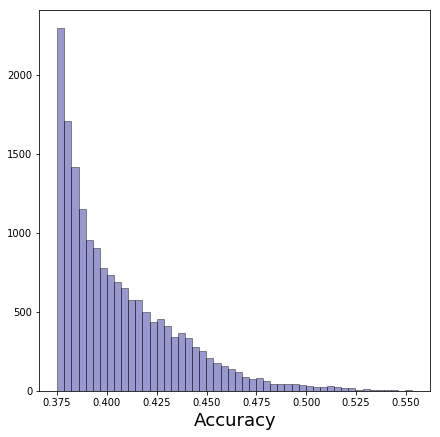

In [6]:
#histogram for selected accuracy
fig = plt.figure(figsize=[7,7])
fig1 = sns.distplot(df1["final_accuracy"],
                    hist=True, kde=False, 
                    color = 'darkblue',
                    hist_kws={'edgecolor':'black'},
                    kde_kws={'linewidth': 2}, norm_hist=False);
fig1.set_xlabel("Accuracy", fontsize = 18)

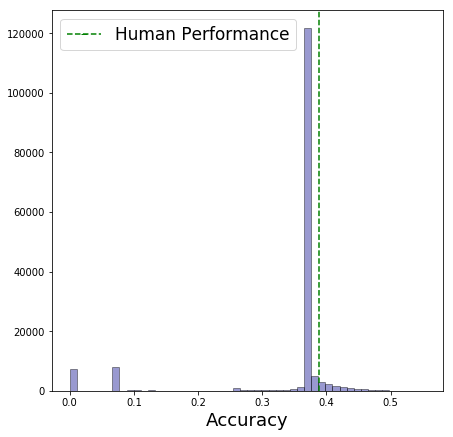

In [7]:
# Histogram for all accuracy
# Histogram for selected accuracy
fig = plt.figure(figsize=[7,7])

fig1 = sns.distplot(df["final_accuracy"],
                    hist=True, kde=False, 
                    color = 'darkblue',
                    hist_kws={'edgecolor':'black'},
                    kde_kws={'linewidth': 2}, norm_hist=False);

fig1.set_xlabel("Accuracy", fontsize = 18)
plt.axvline(x=0.389, ls = "--", c = "green")
# Manually add legend
human_accuracy = mlines.Line2D([], [], color='green', marker='_', linestyle='--',
                                    markersize=6, label='Human Performance', alpha = 1)

plt.legend(handles=[human_accuracy], fontsize = 17)

## Classification between Broken and Healthy Networks

In [5]:
#Since there are ~17k of Healthy networks, randomly select 17k of broken networks to do classification tasks.

#Healthy
df_healthy = df[df['final_accuracy'] > 0.375]
#Broken
df_broken  = df[df['final_accuracy'] <= 0.375]

In [6]:
print("Number of all networks analysed: ", df.shape[0])
print("Number of Healthy Networks: ", df_healthy.shape[0])
print("Percentage Healthy: ", df_healthy.shape[0]/df.shape[0])
print("Number of Broken Networks: ", df_broken.shape[0])
print("Percentage Broken: ", df_broken.shape[0]/df.shape[0])

Number of all networks analysed:  158632
Number of Healthy Networks:  17307
Percentage Healthy:  0.10910156840990469
Number of Broken Networks:  141325
Percentage Broken:  0.8908984315900953


In [7]:
#Select out 17k networks as in healthy networks
sampled_df_broken = df_broken.sample(n = df_healthy.shape[0], random_state = 0)

In [8]:
#Merge into one
classification_df = pd.concat([sampled_df_broken, df_healthy])

In [9]:
#Select the features and dependent variable
X = classification_df.drop(columns=['initial_accuracy','final_accuracy', 'genealogy']) #Features
y = pd.Series([1 if x > 0.375 else 0 for x in classification_df['final_accuracy']]) #dependent variable

In [10]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (34614, 32)
y shape:  (34614,)


In [11]:
#Divide train and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=0)

In [12]:
#Scale the inputs
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

In [13]:
#Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth = 17, min_samples_split=3,
                            bootstrap = False, warm_start = True, random_state=0)

rf.fit(X_train, y_train)

print("Accuracy : %f" % rf.score(X_test, y_test))

Accuracy : 0.705908


In [16]:
rf_cross_val = cross_val_score(rf, X_train, y_train, cv = 5)
print("Average cross-validation score on train set: ", np.average(rf_cross_val))
print("Standard deviation of the cross validation scores: ", np.std(rf_cross_val))

Average cross-validation score on train set:  0.702610635598743
Standard deviation of the cross validation scores:  0.005951898284695331


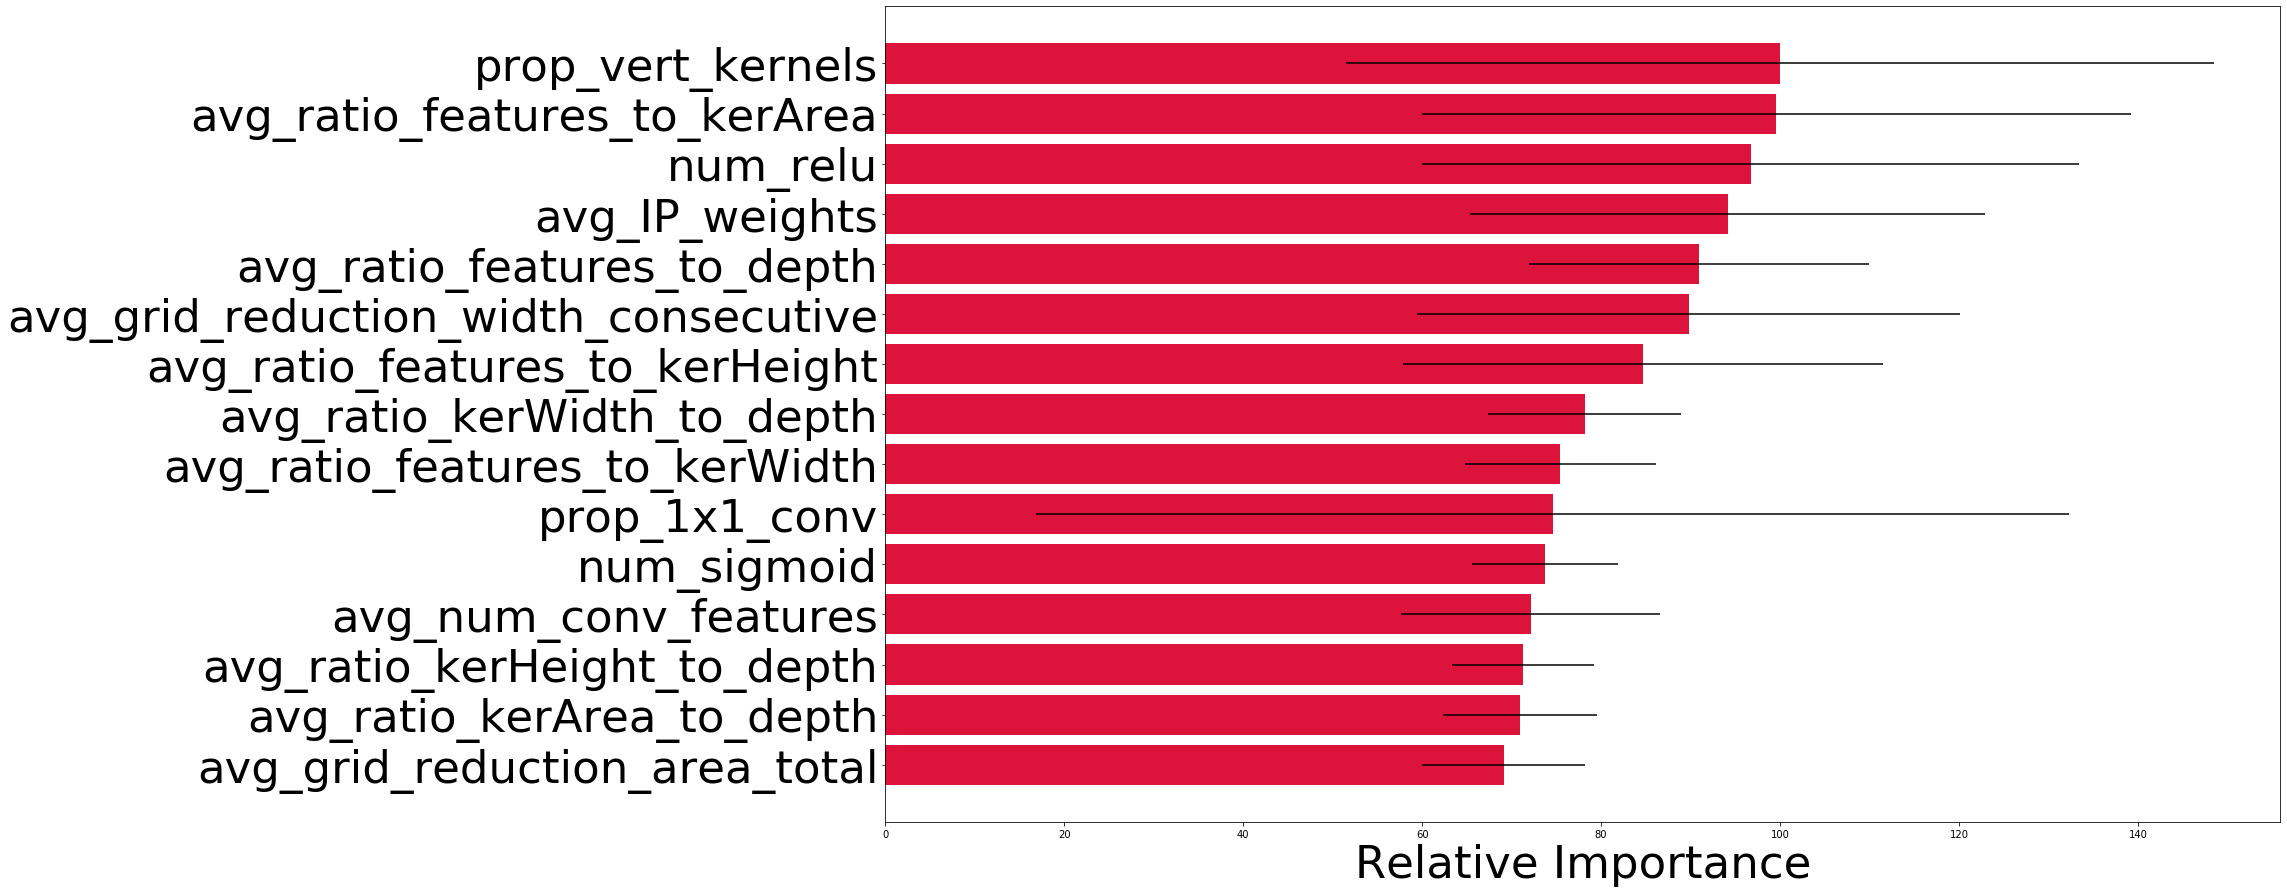

In [20]:
#Extract important features in random forest
feature_importance1 = rf.feature_importances_

# Compute the standard deviation
std1 = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

#scale the std first
std1 = 100.0 * (std1/ feature_importance1.max())

# make importances relative to max importance
feature_importance1 = 100.0 * (feature_importance1 / feature_importance1.max())

features_importance_rf1 = pd.DataFrame({'Feature':X.columns,'Importance':feature_importance1, "Error":std1})

Sorted_Features_importance_rf1 = features_importance_rf1.sort_values(by=['Importance'])

#Just show the first 15 most important features
toShow_15_1 = Sorted_Features_importance_rf1.iloc[-15:,:]

pos = np.arange(toShow_15_1.shape[0]) + .5

fig = plt.figure(figsize = [25,15])
plt.barh(pos, toShow_15_1['Importance'], align='center', xerr = toShow_15_1['Error'], color = "crimson")
plt.yticks(pos, toShow_15_1['Feature'], fontsize = 45)
plt.xlabel('Relative Importance', fontsize = 45)
plt.show()

In [14]:
#Extract important features in random forest
feature_importance1 = rf.feature_importances_

# Compute the standard deviation
std1 = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

features_importance_rf1 = pd.DataFrame({'Feature':X.columns,'Importance':feature_importance1, "Error":std1})

features_importance_rf1.sort_values(by=['Importance'], ascending = False)

Feature  Importance     Error
13                      prop_vert_kernels    0.048706  0.023617
26          avg_ratio_features_to_kerArea    0.048499  0.019308
14                               num_relu    0.047102  0.017901
4                          avg_IP_weights    0.045849  0.014030
25            avg_ratio_features_to_depth    0.044314  0.009260
18   avg_grid_reduction_width_consecutive    0.043734  0.014772
28        avg_ratio_features_to_kerHeight    0.041261  0.013077
30            avg_ratio_kerWidth_to_depth    0.038067  0.005253
27         avg_ratio_features_to_kerWidth    0.036754  0.005192
10                          prop_1x1_conv    0.036331  0.028120
15                            num_sigmoid    0.035907  0.003957
7                   avg_num_conv_features    0.035129  0.007060
31           avg_ratio_kerHeight_to_depth    0.034730  0.003860
29             avg_ratio_kerArea_to_depth    0.034534  0.004197
19          avg_grid_reduction_area_total    0.033655  0.004438
16    avg_grid_reduction_area_consecutive    0.032984  0.005253
17  avg_grid_reduction_height_consecutive    0.031558  0.003031
22                    prop_nonoverlapping    0.031198  0.018757
21         avg_grid_reduction_width_total    0.031080  0.004162
12                     prop_horiz_kernels    0.030291  0.006605
20        avg_grid_reduction_height_total    0.029358  0.003193
23                           avg_stride_h    0.029132  0.002971
1                         num_conv_layers    0.025555  0.013567
11                    prop_square_kernels    0.025244  0.015418
9                     prop_pool_into_pool    0.024833  0.007331
0                           net_depth_avg    0.023086  0.002754
24                           avg_stride_w    0.022913  0.007184
8                     prop_conv_into_pool    0.021068  0.002812
3                          avg_IP_neurons    0.020409  0.006790
2                      num_pooling_layers    0.016718  0.002363
6                        avg_concat_width    0.000000  0.000000
5                         avg_split_width    0.000000  0.000000

In [22]:
#Dropping most important features
rf_crvals, std_rf_crvals, num_trimmed = drop_feature(rf,Sorted_Features_importance_rf1, X, y, 15)

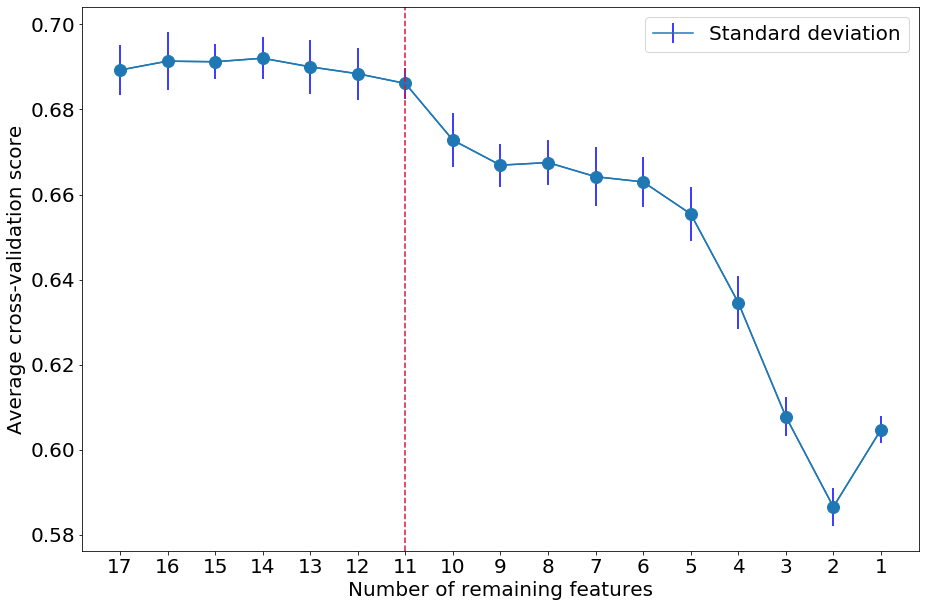

In [23]:
#Plotting
num_remaining = X.shape[1] - np.array(num_trimmed)

fig = plt.figure(figsize = [15,10])
plt.plot(num_trimmed, rf_crvals,'-o', markersize = 12)

#Set ticks
plt.yticks(fontsize = 20)
plt.xticks(num_trimmed,num_remaining, fontsize = 20)

#Error bars
plt.errorbar(num_trimmed, rf_crvals, yerr= std_rf_crvals, ecolor = "blue",
            label='Standard deviation')

plt.legend(loc="best", fontsize = 20)

#Set labels
plt.ylabel("Average cross-validation score", fontsize = 20)
plt.xlabel("Number of remaining features", fontsize = 20)

#Set cut off
plt.axvline(x = 21, ls = "--", c = "crimson")

-----------------------

In [15]:
#Extra Tree Classifier
ext = ExtraTreesClassifier(n_estimators=200, max_depth=20, 
                           min_samples_split=2, bootstrap = False, 
                            warm_start = True, random_state=0)
ext.fit(X_train, y_train)

print("Accuracy : %f" % ext.score(X_test, y_test))

Accuracy : 0.705475


In [16]:
ext_cross_val = cross_val_score(ext, X_train, y_train, cv = 5)
print("Cross-validation score on train set: ", np.average(ext_cross_val))
print("Standard deviation of cross validation score: ", np.std(ext_cross_val) )

Cross-validation score on train set:  0.7020331552272794
Standard deviation of cross validation score:  0.002827984888600217


In [17]:
#Extract important features in extremely randomized tree
feature_importance2 = ext.feature_importances_

# Compute the standard deviation
std2 = np.std([tree.feature_importances_ for tree in ext.estimators_], axis=0)

features_importance_rf2 = pd.DataFrame({'Feature':X.columns,'Importance':feature_importance2, "Error":std2})

In [19]:
features_importance_rf2.sort_values(by = "Importance", ascending = False)

Feature  Importance     Error
13                      prop_vert_kernels    0.058717  0.027958
14                               num_relu    0.051954  0.018104
15                            num_sigmoid    0.043866  0.004900
10                          prop_1x1_conv    0.043120  0.022802
1                         num_conv_layers    0.042183  0.014154
22                    prop_nonoverlapping    0.039054  0.015901
18   avg_grid_reduction_width_consecutive    0.038115  0.016648
3                          avg_IP_neurons    0.035902  0.008930
11                    prop_square_kernels    0.035819  0.019147
21         avg_grid_reduction_width_total    0.035409  0.011637
9                     prop_pool_into_pool    0.034128  0.009283
26          avg_ratio_features_to_kerArea    0.033479  0.010913
25            avg_ratio_features_to_depth    0.033178  0.009663
12                     prop_horiz_kernels    0.032338  0.009477
7                   avg_num_conv_features    0.032046  0.007370
28        avg_ratio_features_to_kerHeight    0.031829  0.008840
27         avg_ratio_features_to_kerWidth    0.029956  0.006303
30            avg_ratio_kerWidth_to_depth    0.029380  0.004343
4                          avg_IP_weights    0.029071  0.010093
20        avg_grid_reduction_height_total    0.028620  0.006042
19          avg_grid_reduction_area_total    0.028593  0.007202
0                           net_depth_avg    0.028139  0.003515
16    avg_grid_reduction_area_consecutive    0.027465  0.006027
31           avg_ratio_kerHeight_to_depth    0.026252  0.002987
8                     prop_conv_into_pool    0.026244  0.003022
2                      num_pooling_layers    0.025599  0.002918
17  avg_grid_reduction_height_consecutive    0.025408  0.003058
29             avg_ratio_kerArea_to_depth    0.025077  0.003560
23                           avg_stride_h    0.024687  0.002845
24                           avg_stride_w    0.024372  0.006343
6                        avg_concat_width    0.000000  0.000000
5                         avg_split_width    0.000000  0.000000

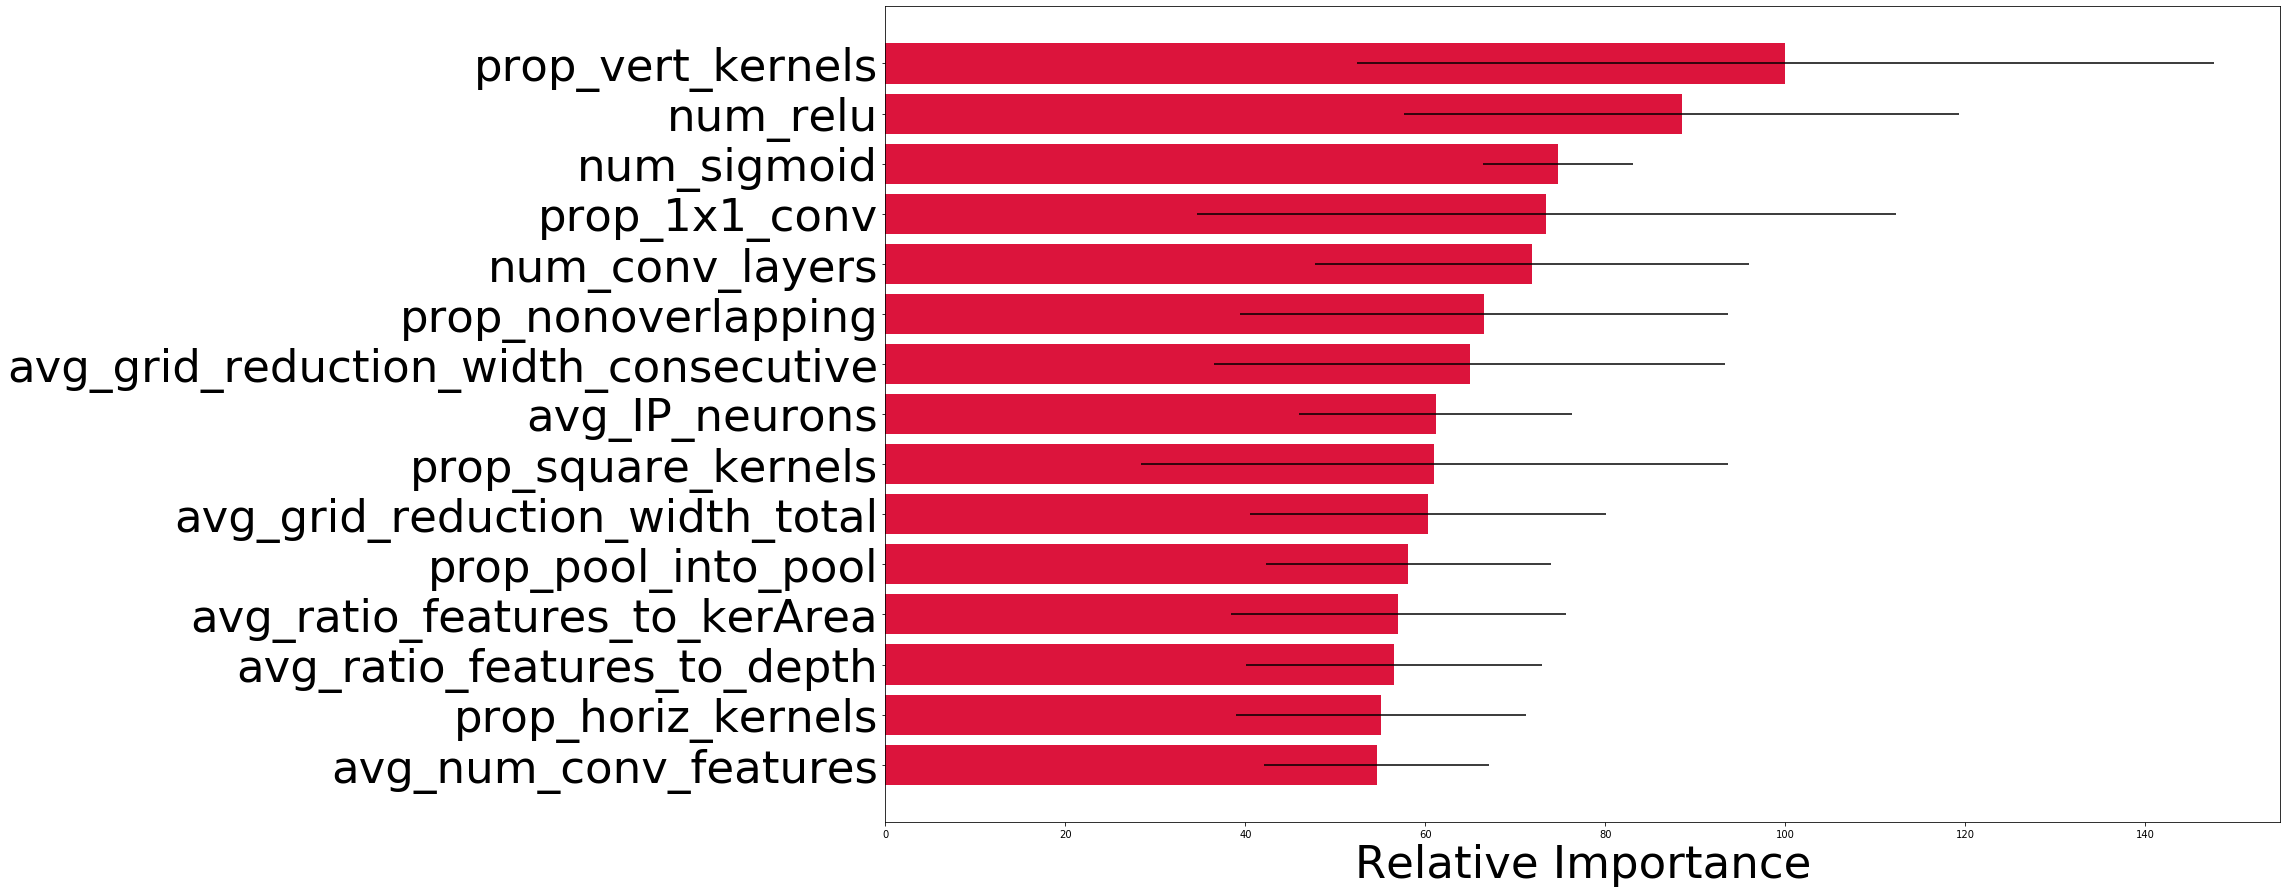

In [26]:
#Extract important features in extremely randomized tree
feature_importance2 = ext.feature_importances_

# Compute the standard deviation
std2 = np.std([tree.feature_importances_ for tree in ext.estimators_], axis=0)

#scale the std first
std2 = 100.0 * (std2/ feature_importance2.max())

# make importances relative to max importance
feature_importance2 = 100.0 * (feature_importance2 / feature_importance2.max())

features_importance_rf2 = pd.DataFrame({'Feature':X.columns,'Importance':feature_importance2, "Error":std2})

Sorted_Features_importance_rf2 = features_importance_rf2.sort_values(by=['Importance'])

#Just show the first 15 most important features
toShow_15_2 = Sorted_Features_importance_rf2.iloc[-15:,:]

pos = np.arange(toShow_15_2.shape[0]) + .5

fig = plt.figure(figsize = [25,15])
plt.barh(pos, toShow_15_2['Importance'], align='center', xerr = toShow_15_2['Error'], color = "crimson")
plt.yticks(pos, toShow_15_2['Feature'], fontsize = 45)
plt.xlabel('Relative Importance', fontsize = 45)
plt.show()

In [27]:
#Dropping most important features
ext_crvals, std_ext_crvals, ext_num_trimmed = drop_feature(ext, Sorted_Features_importance_rf2, X, y, 15)

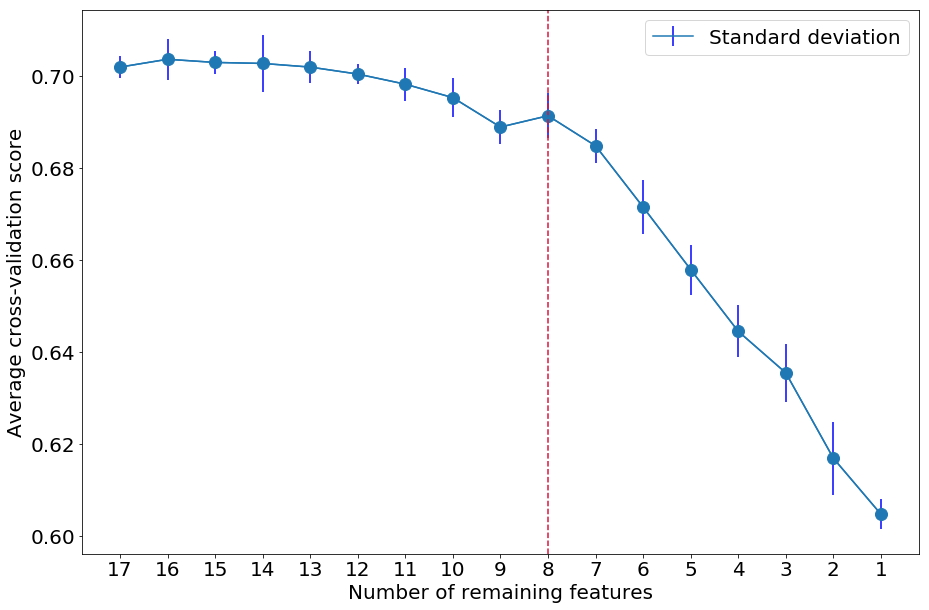

In [32]:
#Plotting
num_remaining = X.shape[1] - np.array(ext_num_trimmed)

fig = plt.figure(figsize = [15,10])
plt.plot(num_trimmed, ext_crvals,'-o', markersize = 12)

#Set ticks
plt.yticks(fontsize = 20)
plt.xticks(num_trimmed,num_remaining, fontsize = 20)

#Error bars
plt.errorbar(num_trimmed, ext_crvals, yerr= std_ext_crvals, ecolor = "blue",
            label='Standard deviation')

plt.legend(loc="best", fontsize = 20)

#Set labels
plt.ylabel("Average cross-validation score", fontsize = 20)
plt.xlabel("Number of remaining features", fontsize = 20)

#Set cut off
plt.axvline(x = 24, ls = "--", c = "crimson")

---------------------

In [33]:
#Combine both models

Text(0.5, 0, 'Number of remaining features')

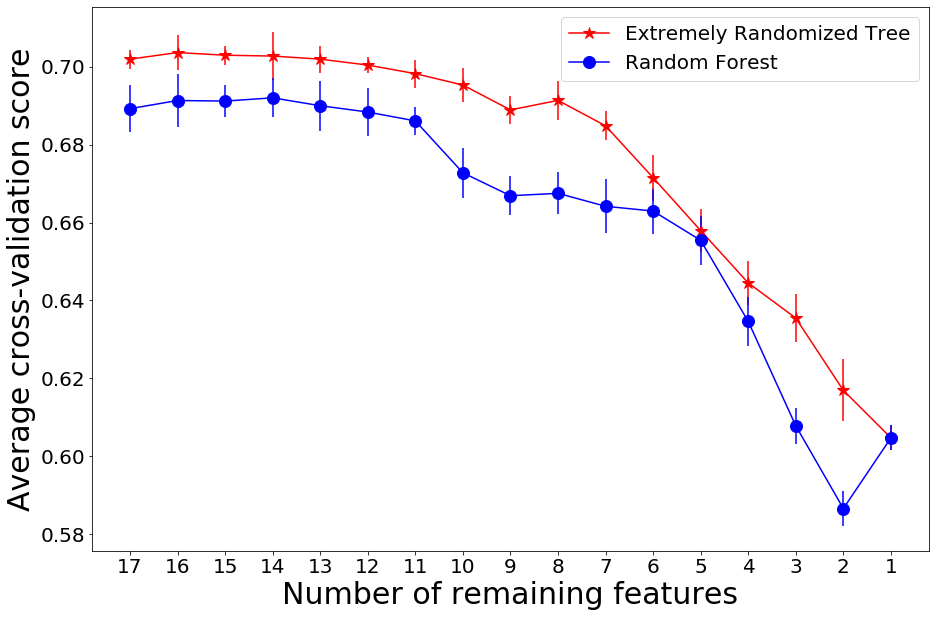

In [31]:
#Plotting
num_remaining = X.shape[1] - np.array(ext_num_trimmed)

fig = plt.figure(figsize = [15,10])
plt.plot(num_trimmed, ext_crvals, "r*-", markersize = 12, c = 'red', label = "Extremely Randomized Tree")
plt.plot(num_trimmed, rf_crvals,'bo-', markersize = 12, label = "Random Forest")

plt.legend(loc="best", fontsize = 20)

#Set ticks
plt.yticks(fontsize = 20)
plt.xticks(num_trimmed,num_remaining, fontsize = 20)

#Error bars
plt.errorbar(num_trimmed, ext_crvals, yerr= std_ext_crvals, fmt = "r*", ecolor = "red")
plt.errorbar(num_trimmed, rf_crvals, yerr= std_rf_crvals, fmt ="bo", ecolor = "blue")

#Set labels
plt.ylabel("Average cross-validation score", fontsize = 30)
plt.xlabel("Number of remaining features", fontsize = 30)

#Set cut off
#plt.axvline(x = 24, ls = "--", c = "crimson")

## Regression on Healthy Networks

Text(0.5, 1.0, 'Transformed Accuracy')

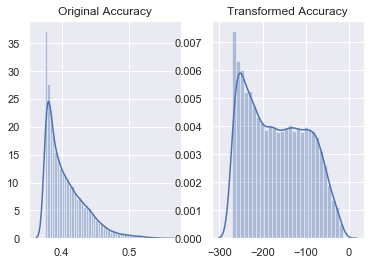

In [123]:
# normalize the exponential data with boxcox
normalized_accuracy = stats.boxcox(df_healthy["final_accuracy"])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_healthy['final_accuracy'], ax=ax[0])
ax[0].set_title("Original Accuracy")
ax[0].set(xlabel='')
sns.distplot(normalized_accuracy[0], ax=ax[1])
ax[1].set_title("Transformed Accuracy")

In [124]:
df_healthy["transformed_accuracy"] = normalized_accuracy[0]

In [139]:
#Feature + target
X_reg = df_healthy.drop(columns=['initial_accuracy','final_accuracy', 'genealogy',"transformed_accuracy"]) #Features
y_reg = df_healthy["transformed_accuracy"]

#Extract initial feature names and index for later use
initial_feature_names = X_reg.columns #Save the feature names
initial_index = X_reg.index

In [140]:
#Scale the inputs
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_reg)  
X_reg = scaler.transform(X_reg) 

In [141]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_reg = poly.fit_transform(X_reg) #Create interaction terms 

In [142]:
#Fit model
model = sm.OLS(y_reg, X_reg)

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     transformed_accuracy   R-squared:                       0.481
Model:                              OLS   Adj. R-squared:                  0.243
Method:                   Least Squares   F-statistic:                     2.017
Date:                  Mon, 15 Jul 2019   Prob (F-statistic):          1.77e-216
Time:                          14:03:42   Log-Likelihood:                -92337.
No. Observations:                 17307   AIC:                         1.956e+05
Df Residuals:                     11852   BIC:                         2.379e+05
Df Model:                          5454                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.6034      6.019      2.592      0.010       3.804      27.402
x2           -17.7672      5.390     -3.296      0.001     -28.332      -7.202
x3           -14.5278      5.730     -2.535      0.011     -25.760      -3.295
x4           -17.6637      5.602     -3.153      0.002     -28.645      -6.682
x5            -0.3567      2.924     -0.122      0.903      -6.089       5.375
const       6.286e-11    4.1e-11      1.531      0.126   -1.76e-11    1.43e-10
x6            53.0171     11.125      4.766      0.000      31.211      74.823
x7            18.8024      6.085      3.090      0.002       6.875      30.730
x8             9.8734      5.617      1.758      0.079      -1.137      20.884
x9            -3.5068      2.492     -1.407      0.159      -8.392       1.379
x10            1.4471      3.533      0.410      0.682      -5.477       8.372
x11           -0.1246      2.815     -0.044      0.965      -5.643       5.394
x12            2.2152      2.441      0.908      0.364      -2.569       6.999
x13            2.3286      2.661      0.875      0.382      -2.887       7.545
x14           15.1255      3.740      4.044      0.000       7.794      22.457
x15           16.8302      2.219      7.585      0.000      12.481      21.179
x16            0.4661      7.823      0.060      0.952     -14.868      15.800
x17            0.1224      6.841      0.018      0.986     -13.286      13.531
x18            0.8298      5.137      0.162      0.872      -9.240      10.899
x19            0.5490      3.956      0.139      0.890      -7.206       8.304
x20            1.8798      3.399      0.553      0.580      -4.783       8.543
x21           -5.5443      4.050     -1.369      0.171     -13.482       2.394
x22           -2.7507      2.559     -1.075      0.282      -7.766       2.265
x23           -1.6623      2.870     -0.579      0.562      -7.288       3.963
x24            3.3427      4.277      0.781      0.435      -5.042      11.727
x25           -9.2404      4.760     -1.941      0.052     -18.571       0.090
x26            4.6967      6.964      0.674      0.500      -8.955      18.348
x27           -7.7995      4.116     -1.895      0.058     -15.867       0.268
x28          -10.7260      5.451     -1.968      0.049     -21.410      -0.042
x29           -0.3516      4.271     -0.082      0.934      -8.723       8.020
x30           -0.9287      2.212     -0.420      0.675      -5.265       3.408
x31           -3.2783      2.647     -1.239      0.215      -8.466       1.910
x32           18.2329     85.341      0.214      0.831    -149.050     185.515
x33           -5.9048    116.384     -0.051      0.960    -234.037     222.228
x34          -29.7844    102.088     -0.292      0.770    -229.893     170.324
x35           53.1181     32.783      1.620      0.105     

In [1]:
#Inspect most important feautures in classification model:
#prop_vert_kernels
#num_relu
#num_sigmoid
#avg_ratio_features_to_depth
#avg_ratio_features_to_kerArea
#avg_num_conv_features
#prop_1x1_conv
#avg_grid_reduction_width_consecutive

In [9]:
#Create dataset
df = classification_df

In [10]:
#box plot
df['group'] = [0 if x < 0.375 else 1 for x in df['final_accuracy']]

Text(0.5, 0, '')

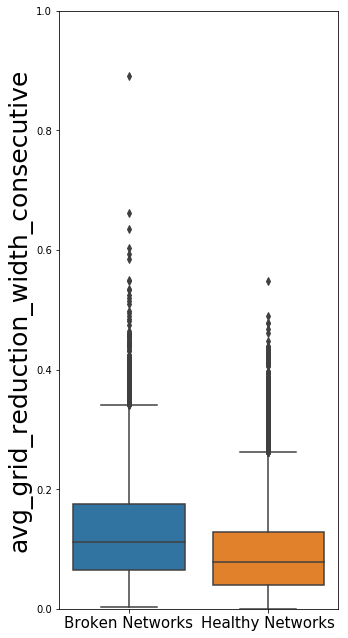

In [13]:
#avg_grid_reduction_width_consecutive
var = 'group_name'
data = pd.concat([df['avg_grid_reduction_width_consecutive'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 11))
fig = sns.boxplot(x=var, y='avg_grid_reduction_width_consecutive', order = ["Broken Networks","Healthy Networks"], data=data)
fig.axis(ymin=0, ymax=1);
plt.xticks(fontsize=15);
ax.yaxis.label.set_size(25)
fig.set_xlabel('')

Text(0.5, 0, '')

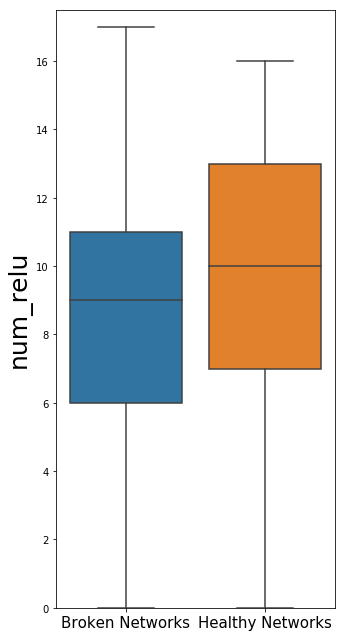

In [43]:
#num_relu
var = 'group_name'
data = pd.concat([df['num_relu'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 11))
fig = sns.boxplot(x=var, y='num_relu', order = ["Broken Networks","Healthy Networks"], data=data)
fig.axis(ymin=0, ymax=17.50);
plt.xticks(fontsize=15);
ax.yaxis.label.set_size(25)
fig.set_xlabel('')

Text(0.5, 0, '')

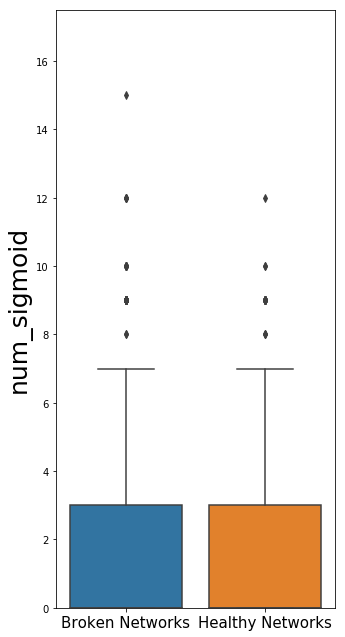

In [44]:
#num_relu
var = 'group_name'
data = pd.concat([df['num_sigmoid'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 11))
fig = sns.boxplot(x=var, y='num_sigmoid', order = ["Broken Networks","Healthy Networks"], data=data)
fig.axis(ymin=0, ymax=17.50);
plt.xticks(fontsize=15);
ax.yaxis.label.set_size(25)
fig.set_xlabel('')

Text(0.5, 0, '')

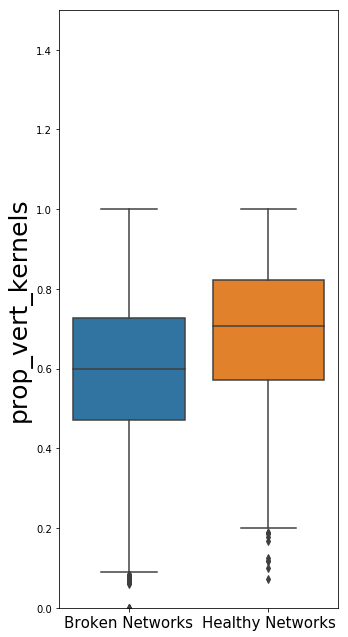

In [35]:
var = 'group_name'
data = pd.concat([df['prop_vert_kernels'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 11))
fig = sns.boxplot(x=var, y='prop_vert_kernels', order = ["Broken Networks","Healthy Networks"], data=data)
fig.axis(ymin=0, ymax=1.5);
plt.xticks(fontsize=15);
ax.yaxis.label.set_size(25)
fig.set_xlabel('')

In [1]:
#avg_ratio_features_to_depth
#avg_ratio_features_to_kerArea
#prop_1x1_conv
#avg_num_conv_features
#avg_grid_reduction_width_consecutive

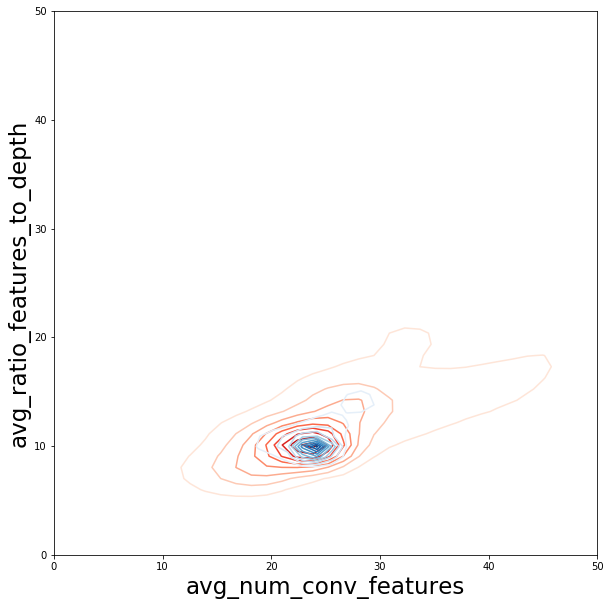

In [23]:
#avg_ratio_features_to_kerArea and avg_ratio_features_to_depth
data1 = df[df['group'] == 0]
data2 = df[df['group'] == 1]
# Set up the figure
f, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(data1['avg_num_conv_features'], data1['avg_ratio_features_to_depth'],
                 cmap="Reds", shade=False, shade_lowest=False)
ax = sns.kdeplot(data2['avg_num_conv_features'], data2['avg_ratio_features_to_depth'],
                 cmap="Blues", shade=False, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
#ax.text(13, 12.5, "Broken", size=17, color=blue)
#ax.text(3.75, 8.25, "Healthy", size=17, color=red)
plt.xlim(0,50)
plt.ylim(0,50)
ax.yaxis.label.set_size(23)
ax.xaxis.label.set_size(23)

In [11]:
#box plot
df['group_name'] = ["Healthy Networks" if x > 0.375 else "Broken Networks" for x in df['final_accuracy']]

Text(0.5, 0, '')

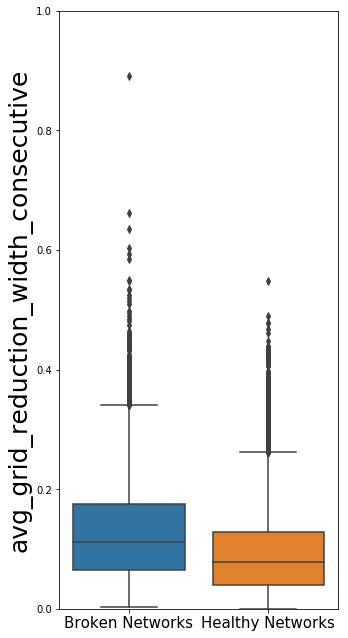

In [23]:
var = 'group_name'
data = pd.concat([df['avg_grid_reduction_width_consecutive'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 11))
fig = sns.boxplot(x=var, y='avg_grid_reduction_width_consecutive', order = ["Broken Networks","Healthy Networks"], data=data)
fig.axis(ymin=0, ymax=1);
plt.xticks(fontsize=15);
ax.yaxis.label.set_size(25)
fig.set_xlabel('')

Text(0.5, 0, '')

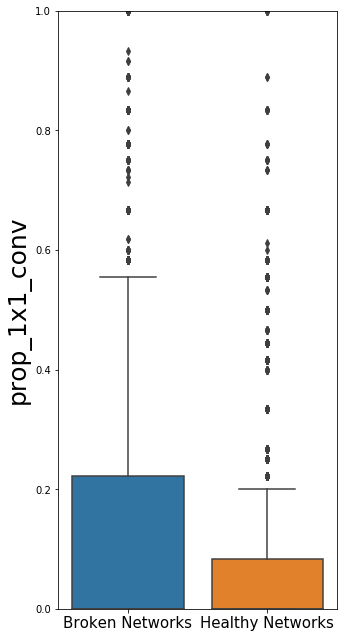

In [14]:
var = 'group_name'
data = pd.concat([df['prop_1x1_conv'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 11))
fig = sns.boxplot(x=var, y='prop_1x1_conv', order = ["Broken Networks","Healthy Networks"], data=data)
fig.axis(ymin=0, ymax=1);
plt.xticks(fontsize=15);
ax.yaxis.label.set_size(25)
fig.set_xlabel('')

In [18]:
import plotly.figure_factory as ff
import numpy as np
import pandas as pd

data1 = df[df['group_name'] == "Broken Networks"]
data2 = df[df['group_name'] == "Healthy Networks"]

fig = ff.create_distplot([data1['prop_1x1_conv'],data2['prop_1x1_conv']], ["Broken", "Healthy"], bin_size=.05)
fig.show()